# \=-=-=-=-=-=-=-=/.::[ سوال 1 ]::.\=-=-=-=-=-=-=-=/
### برای جایگزین کردن داده های کمّی نامعلوم میتوان از میانگین داده های معلوم استفاده کرد 

In [1]:
# importing libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import scipy.stats as stats
import statsmodels.api as sm 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# loading data right from the source:
fifa_df = pd.read_csv('Datasets/FIFA/FIFA2020.csv',encoding = "ISO-8859-1")

In [3]:
# محاسبه تعداد داده های معلوم در 2 ستون سرعت و دریبل زدن
pace_m = len(fifa_df) - fifa_df['pace'].isnull().sum()
dribbling_m = len(fifa_df) - fifa_df['dribbling'].isnull().sum()

# محاسبه مجموع داده های معلوم در 2 ستون سرعت و دریبل زدن
pace_total = fifa_df['pace'].sum()
dribbling_total = fifa_df['dribbling'].sum()

# محاسبه میانگین داده های معلوم در 2 ستون سرعت و دریبل زدن
pace_avg = pace_total/pace_m
dribbling_avg = dribbling_total/dribbling_m

# جایگذاری میانگین داده های معلوم به جای مقادیر نامعلوم
fifa_df = fifa_df.fillna(value = {'pace':pace_avg , 'dribbling':dribbling_avg})

# \=-=-=-=-=-=-=-=/.::[ سوال 2 ]::.\=-=-=-=-=-=-=-=/
## الف :

(min , Q1 , Q2 , Q3 , max) = (12.5 , 23.0 , 26.0 , 30.0 , 40.5)


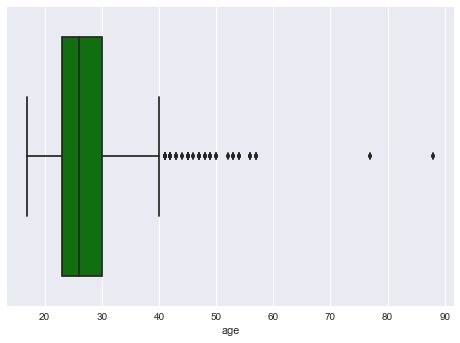

In [4]:
plt.style.use('seaborn')
age = fifa_df['age']
age_sorted = np.sort(fifa_df.loc[:,'age'])
ax = sns.boxplot(x=age,color="g")
Q2 = np.median(age_sorted)
Q1 = np.median(age_sorted[:int(len(age)/2)])
Q3 = np.median(age_sorted[int(len(age)/2):])
IQR = Q3 - Q1
Max = 1.5*IQR + Q3
Min = Q1 - 1.5*IQR
print('(min , Q1 , Q2 , Q3 , max) = (' + str(Min) + ' , ' + str(Q1) + ' , ' + str(Q2) + ' , ' + str(Q3) + ' , ' + str(Max) + ')')

##  (min , Q1 , Q2 , Q3 , max) : نمودار جعبه ای
### میانه (Q2):
این شاخص آماری مقداری را نشان میدهد که در وسط داده ها قرار دارد

مشخص است که ۵۰٪ داده ها از این مقدار کوچکتر یا بزرگتر هستند

این مقدار توسط خطی عمودی درون جعبه، نشان داده شده است
### چارک اول (Q1):
این شاخص مقداری را نشان میدهد که ۲۵٪ داده ها از آن کوچکتر هستند

از طرفی میتوان این مقدار را میانه داده هایی دانست که بین کوچکترین مقدار (با توجه به داده های پرت) و میانه قرار گرفته اند

این مقدار توسط خطی عمودی بدنه سمت چپ جعبه را میسازد
### چارک سوم (Q3):
این شاخص مقداری را نشان میدهد که ۷۵٪ داده ها از آن کوچکتر هستند

از طرفی میتوان این مقدار را میانه داده هایی دانست که بین بزرگترین مقدار (با توجه به داده های پرت) و میانه قرار گرفته اند

این مقدار توسط خطی عمودی بدنه سمت راست جعبه را میسازد
### دامنه میان چارکی (IQR):
فاصله بین چارک اول و سوم توسط این شاخص نشان داده میشود

همچنین طول اضلاع دیگر جعبه توسط این شاخص تعیین میشود
### حداکثر- بزرگترین مقدار (Maximum):
بزرگترین مقدار، بیشترین مقداری است که حداکثر 1.5 برابر دامنه میان چارکی از چارک سوم فاصله دارد
### حداقل- کوچکترین مقدار (Minimum):
کوچکترین مقدار، کمترین مقداری است که حداکثر 1.5 برابر دامنه میان چارکی از چارک اول فاصله دارد


## ب :

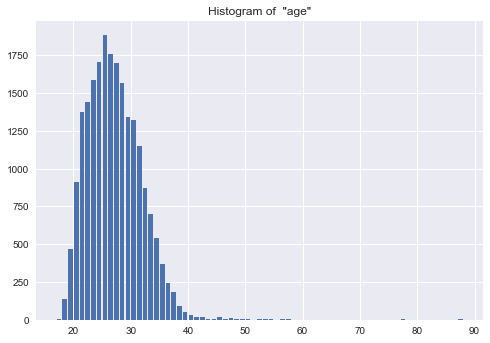

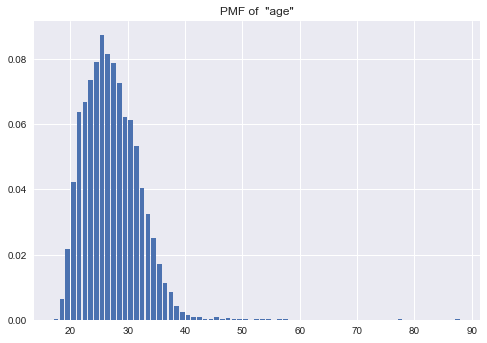

In [5]:
# Histogram:
hist,bins = np.histogram(age,max(age)-min(age)) 
mid_bins = [(bins[i-1]+bins[i])/2 for i in range(1,len(bins))]
plt.bar(mid_bins,hist)
plt.title('Histogram of  "age"')
plt.show()

# PMF:
PMF = hist / len(age)
plt.bar(mid_bins,PMF)
plt.title('PMF of  "age"')
plt.show()

## ج :

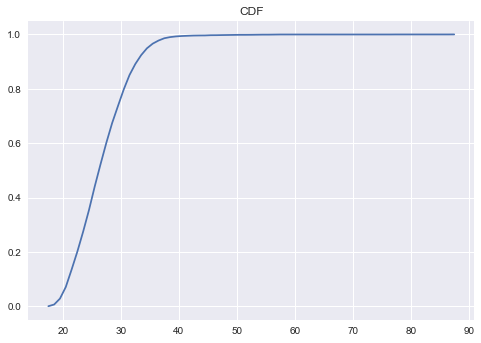

In [6]:
# CDF
result = []
sum = 0
for i in range(1,len(hist)+1):
    sum += hist[i-1]
    result.append(sum)
CDF = [result[i-1]/len(age) for i in range(1,len(result)+1)]
plt.plot(mid_bins,CDF)
plt.title('CDF')
plt.show()

## د :

In [7]:
# P(20 < x < 24) = Fx(24) - Fx(20)
# ،در اینجا چون تعداد بازه های هیستوگرام را به اندازه اختلاف بیشترین سن و کمترین سن گرفتیم
# .انتظار میرود که هر سن مشخصی درون یک بازه قرار گیرد
# :برای بدست آوردن احتمال خواسته شده کافیست شماره بازه سن 20 و 24 را شناسایی کنیم که میتوان بصورت زیر عمل کرد
Prob = CDF[24 - min(age)] - CDF[20 - min(age)]
print('P(20 < x < 24) = Fx(24) - Fx(20) = ' + str(CDF[24 - min(age)]) + ' - ' + str(CDF[20 - min(age)]) + ' = ' + str(Prob))
# دقت شود که توزیع تجمعی در اینجا دقیقا به اندازه اختلاف بیشترین سن و کمترین سن، عضو دارد

P(20 < x < 24) = Fx(24) - Fx(20) = 0.3535086498770929 - 0.07054403784611103 = 0.2829646120309819


# \=-=-=-=-=-=-=-=/.::[ سوال 3 ]::.\=-=-=-=-=-=-=-=/
## الف :

In [8]:
np.random.seed(12345679)
weight = fifa_df['weight'].sample(100)
weight_avg = weight.sum()/100 # میانگین
weight_var = np.var(weight) # واریانس
weight_sigma = math.sqrt(weight_var) # انحراف معیار
print('Weight Average = ' + str(weight_avg) + ' , Weight Variance = ' + str(weight_var) + ' , Weight sigma = ' + str(weight_sigma))

Weight Average = 74.82 , Weight Variance = 55.52759999999998 , Weight sigma = 7.451684373348081


## ب :

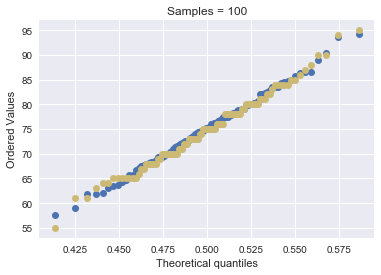

In [9]:
np.random.seed(12345679)
weight_normal = np.random.normal(weight_avg, weight_sigma, 100)

# QQ : Quantile-Quantile :

# weight_normal: blue
# weight : yellow

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
stats.probplot(weight_normal, dist=stats.beta, sparams=(100,100), plot=plt, fit=False)
stats.probplot(weight, dist=stats.beta, sparams=(100,100), plot=plt, fit=False)

# Remove the regression lines
ax.get_lines()[1].remove()
ax.get_lines()[2].remove()

# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('C0')
ax.get_lines()[1].set_markerfacecolor('C4')
plt.title('Samples = 100');

### از آنجایی که منحنی ها، تقریبا بر هم منطبق هستند میتوان نتیجه گرفت که توزیع نمونه های دیتاست تقریبا مشابه یک توزیع نرمال میباشد

## ج :

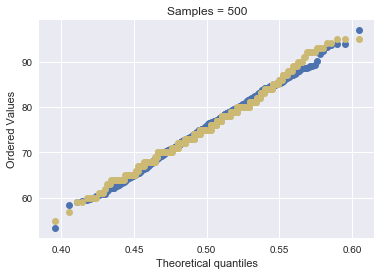

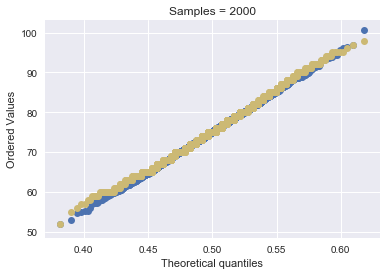

In [10]:
# n = 500
# n = 2000
for n in [500,2000]:
    np.random.seed(12345679)
    weight = fifa_df['weight'].sample(n)
    weight_avg = weight.sum()/n # میانگین
    weight_var = np.var(weight) # واریانس
    weight_sigma = math.sqrt(weight_var) # انحراف معیار
    np.random.seed(12345679)
    weight_normal = np.random.normal(weight_avg, weight_sigma, n)
    
    # QQ : Quantile-Quantile :

    # weight_normal: blue
    # weight : yellow

    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    stats.probplot(weight_normal, dist=stats.beta, sparams=(100,100), plot=plt, fit=False)
    stats.probplot(weight, dist=stats.beta, sparams=(100,100), plot=plt, fit=False)

    # Remove the regression lines
    ax.get_lines()[1].remove()
    ax.get_lines()[2].remove()

    # Change colour of scatter
    ax.get_lines()[0].set_markerfacecolor('C0')
    ax.get_lines()[1].set_markerfacecolor('C4')
    plt.title('Samples = ' + str(n))

### نمودار اول برای 500 نمونه و نمودار دوم برای 2000 نمونه میباشد
### :با توجه به خروجی نمودارها و قضیه حد مرکزی میتوان گفت
### با افزایش تعداد داده های مورد بررسی، توزیع آنها رفته رفته بیشتر شبیه به توزیع نرمال خواهد شد
### در نمودار اول منحنی زرد که نشان دهنده داده های داخل دیتاست میباشد، به طور کامل بر روی نمودار آبی قرار نگرفته است
### اما در نمودار دوم با افزایش تعداد داده تقریبا هر دو منحنی بر هم منطبق شدند که درستی قضیه حد مرکزی را نشان میدهد

# \=-=-=-=-=-=-=-=/.::[ سوال 4 ]::.\=-=-=-=-=-=-=-=/
## الف :

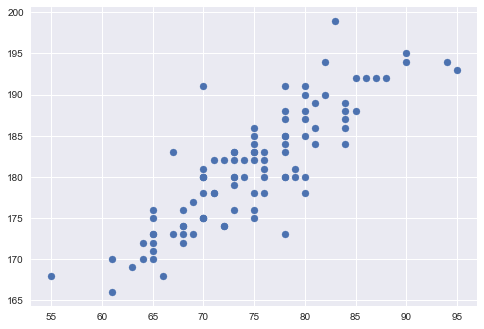

In [11]:
np.random.seed(12345679)
weight = fifa_df['weight'].sample(100)
np.random.seed(12345679)
height = fifa_df['height'].sample(100)
plt.scatter(weight, height)
plt.show()

### همانطور که از خروجی نمودار هم مشخص است، متغییرهای قد و وزن بسیار وابسته به هم هستند و کسی که قدش بلندتر باشه به احتمال زیاد وزنش بیشتره یا به عبارت دیگر با افزایش وزن انتظار میرود قد هم افزایش یابد

## ب :

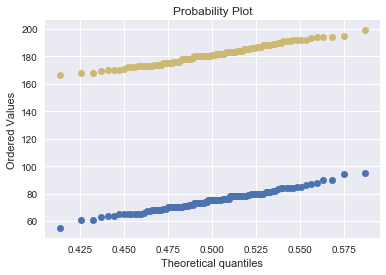

In [12]:
# comparison weight and height with QQ plot:
# QQ : Quantile-Quantile :

# weight: blue
# height : yellow

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
stats.probplot(weight, dist=stats.beta, sparams=(100,100), plot=plt, fit=False)
stats.probplot(height, dist=stats.beta, sparams=(100,100), plot=plt, fit=False)

# Remove the regression lines
ax.get_lines()[1].remove()
ax.get_lines()[2].remove()

# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('C0')
ax.get_lines()[1].set_markerfacecolor('C4')

### از هم شیب بودن منحنی های قد و وزن میتوان هم توزیع بودن آنها را نتیجه گرفت

# \=-=-=-=-=-=-=-=/.::[ سوال 5 ]::.\=-=-=-=-=-=-=-=/
## الف :

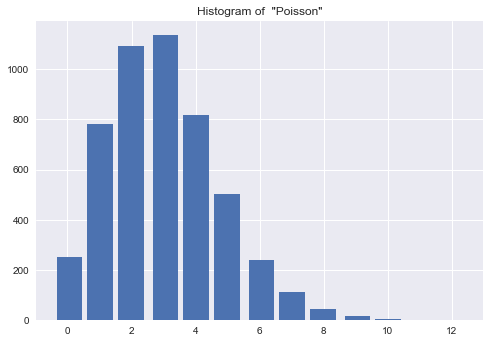

In [13]:
n = 5000
np.random.seed(12345679)
Poisson = np.random.poisson(3, n)
# Histogram:
hist,bins = np.histogram(Poisson,100) 
mid_bins = [(bins[i-1]+bins[i])/2 for i in range(1,len(bins))]
plt.bar(mid_bins,hist)
plt.title('Histogram of  "Poisson"')
plt.show()

## ب :

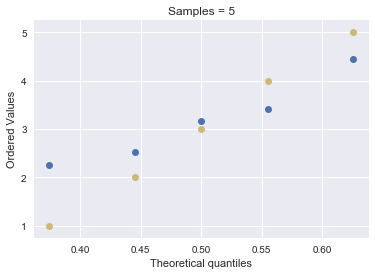

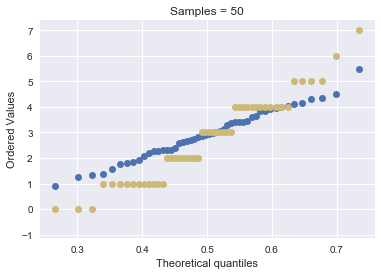

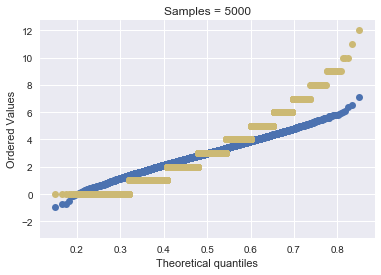

In [14]:
# n = 5 , 50 , 5000 and compare with QQ plot
for n in [5, 50, 5000]:
    np.random.seed(12345679)
    Poisson = np.random.poisson(3, n)
    normal = np.random.normal(3,1,n)
    # QQ : Quantile-Quantile :

    # normal: blue
    # Poisson : yellow

    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    stats.probplot(normal, dist=stats.beta, sparams=(10,10), plot=plt, fit=False)
    stats.probplot(Poisson, dist=stats.beta, sparams=(10,10), plot=plt, fit=False)

    # Remove the regression lines
    ax.get_lines()[1].remove()
    ax.get_lines()[2].remove()

    # Change colour of scatter
    ax.get_lines()[0].set_markerfacecolor('C0')
    ax.get_lines()[1].set_markerfacecolor('C4')
    plt.title('Samples = ' + str(n))

### نتیجه میگیریم همه توزیع ها اگر تعداد نمونه هایشان زیاد شود توزیع نرمال خواهند داشت

# \=-=-=-=-=-=-=-=/.::[ سوال 6 ]::.\=-=-=-=-=-=-=-=/

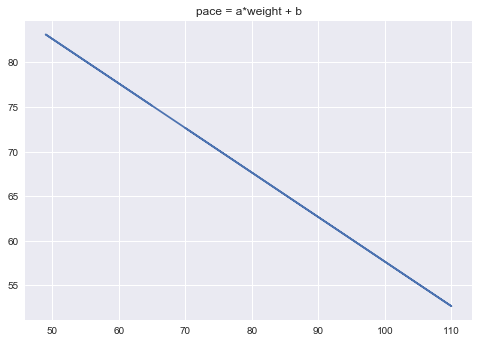

In [15]:
# y = a*x + b
# pace = a*weight + b
# a = (rxy * sigma_y)/sigma_x
# b = mu_y - a*mu_x
weight = fifa_df['weight']
pace = fifa_df['pace']
rxy = weight.corr(pace);
sigma_x = math.sqrt(np.var(weight));
sigma_y = math.sqrt(np.var(pace));
a = (rxy * sigma_y)/sigma_x;
mu_x = weight.sum()/len(weight);
mu_y = pace.sum()/len(pace);
b = mu_y - a*mu_x;
y = a*weight + b;
plt.plot(weight,y)
plt.title('pace = a*weight + b')
plt.show()

### همانطور که انتظار میرفت، شیب نمودار منفی شد. در واقع خروجی نمودار، نشان دهنده این مفهوم بدیهی است که با افزایش وزن بازیکن، سرعت آن کاهش میابد

# \=-=-=-=-=-=-=-=/.::[شبیه سازی فرایند زنجیره ی مارکوف ]::.\=-=-=-=-=-=-=-=/
# :[سوال 1 ]:

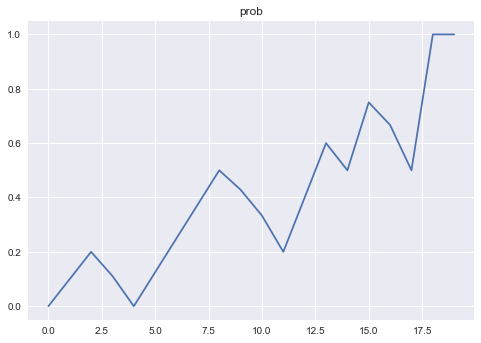

In [16]:
full = 10;
half = 0;
prob = []
i = 0;
while full > 0 or half > 0:
    Rand = np.random.rand();
    prob.append(half / (full + half));
    if (0 < Rand < full / (full + half)):
        full -= 1;
        half += 1;
    elif (half > 0):
        half -= 1;
    else:
        full -= 1;
        half += 1;
plt.plot(prob)
plt.title('prob')
plt.show()

# :[سوال 2 ]:
## الف :

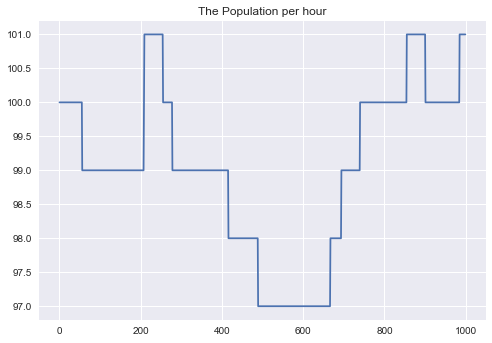

In [17]:
x1 = 100;
pop = [];
i = 0;
while i < 1000:
    pop.append(x1);
    i += 1;
    if x1 > 0:
        #𝑏𝑖𝑟𝑡ℎ
        Rand = np.random.rand();
        if (0 < Rand < 0.5/100):
            x1 += 1;
            
        #𝑑𝑒𝑎𝑡ℎ
        Rand = np.random.rand();
        if (0 < Rand < 0.5/100):
            x1 -= 1;

plt.plot(pop)
plt.title('The Population per hour')
plt.show()

## ب :

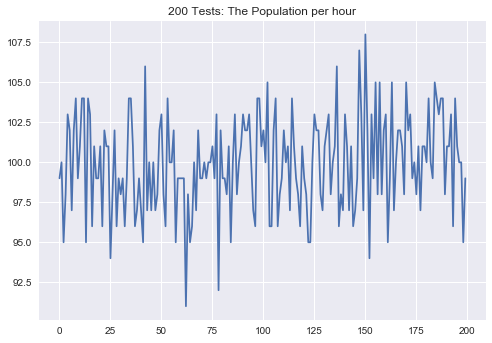

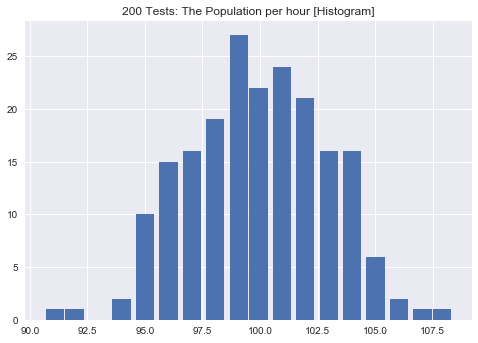

In [18]:
X = [];
n = 200;
for x in range(0,n):
    x1 = 100;
    pop = [];
    i = 0;
    while i < 1000:
        pop.append(x1);
        i += 1;
        if x1 > 0:
            #𝑏𝑖𝑟𝑡ℎ
            Rand = np.random.rand();
            if (0 < Rand < 0.5/x1):
                x1 += 1;
            
            #𝑑𝑒𝑎𝑡ℎ
            Rand = np.random.rand();
            if (0 < Rand < 0.5/x1):
                x1 -= 1;
    X.append(x1);

plt.plot(X)
plt.title('200 Tests: The Population per hour')
plt.show()

# Histogram:
hist,bins = np.histogram(X,100) 
mid_bins = [(bins[i-1]+bins[i])/2 for i in range(1,len(bins))]
plt.bar(mid_bins,hist)
plt.title('200 Tests: The Population per hour [Histogram]')
plt.show()

## پ :

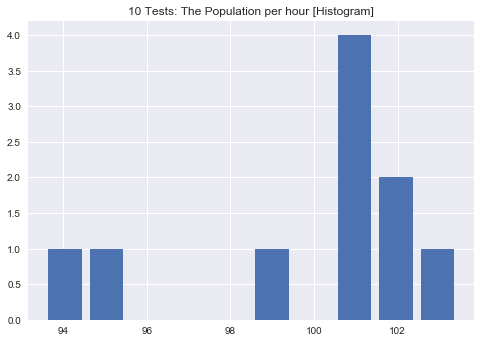

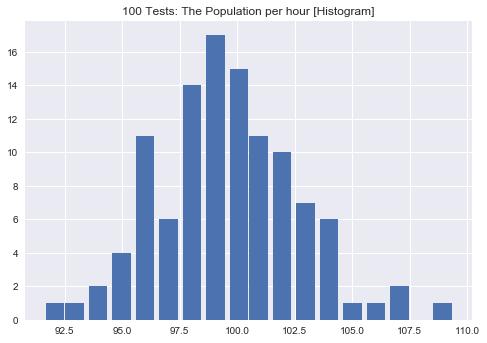

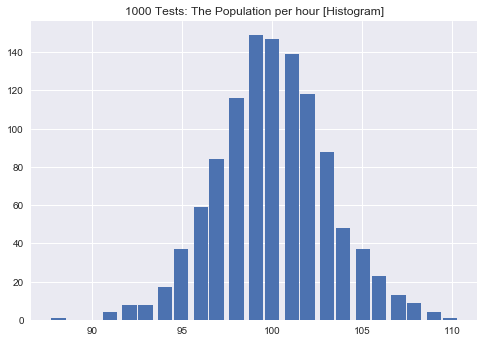

In [19]:
# n = 10 , 100 , 1000
X = [];
for n in [10,100,1000]:
    for x in range(0,n):
        x1 = 100;
        pop = [];
        i = 0;
        while i < 1000:
            pop.append(x1);
            i += 1;
            if x1 > 0:
                #𝑏𝑖𝑟𝑡ℎ
                Rand = np.random.rand();
                if (0 < Rand < 0.5/x1):
                    x1 += 1;
            
                #𝑑𝑒𝑎𝑡ℎ
                Rand = np.random.rand();
                if (0 < Rand < 0.5/x1):
                    x1 -= 1;
        X.append(x1);
    # Histogram:
    hist,bins = np.histogram(X,100) 
    mid_bins = [(bins[i-1]+bins[i])/2 for i in range(1,len(bins))]
    plt.bar(mid_bins,hist)
    plt.title(str(n) + ' Tests: The Population per hour [Histogram]')
    plt.show()

### از نمودارهای هیستوگرام بالا میتوان نتیجه گرفت که مطابق با قضیه حد مرکزی با افزایش تعداد داده های مورد بررسی (در اینجا افزایش آزمایش ها)، توزیع آنها رفته رفته بیشتر شبیه به توزیع نرمال خواهد شد